In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [2]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vy=1, xp=xp
    ),
    ny=N,
    p=p,
    flux_recipe=2,
    MOOD=True,
    max_MOOD_iters=2,
    PAD={"rho": (0, 1)},
    PAD_atol=0.0,
)
sim.run(n=20)

100%|██████████| 20/20 [00:00<00:00, 193.47it/s]


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0000000000000002))

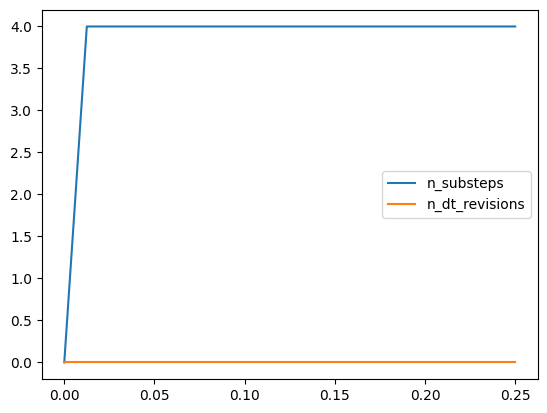

In [4]:
fig, ax = plt.subplots()
vis.plot_timeseries(sim, ax, "n_substeps", label="n_substeps")
vis.plot_timeseries(sim, ax, "n_dt_revisions", label="n_dt_revisions")
ax.legend()

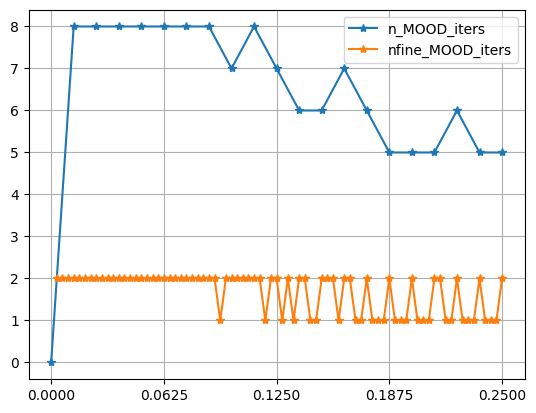

In [5]:
fig, ax = plt.subplots()
vis.plot_timeseries(sim, ax, "n_MOOD_iters", label="n_MOOD_iters", marker="*")
vis.plot_timeseries(sim, ax, "nfine_MOOD_iters", label="nfine_MOOD_iters", marker="*")
ax.grid()
ax.legend()
ax.set_xticks(sim.minisnapshots["t"][::5])

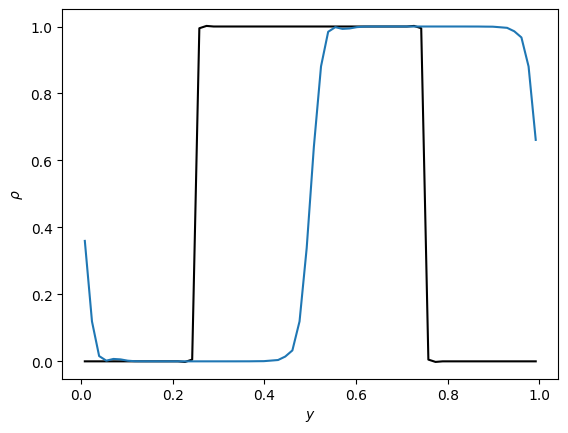

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, xlabel=True)